#### This is an RFM Analysis for an online Store, whose dataset is downloaded from UCI ML repo. website

In [1]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The dataset has been successfully loaded. Here is a preview of the first few rows:

| InvoiceNo | StockCode | Description                       | Quantity | InvoiceDate          | UnitPrice | CustomerID | Country        |
|-----------|-----------|-----------------------------------|----------|----------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER| 6        | 2010-12-01 08:26:00  | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN               | 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER    | 8        | 2010-12-01 08:26:00  | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE| 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84029E    | RED WOOLLY HOTTIE WHITE HEART.    | 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |

I will now proceed with the RFM (Recency, Frequency, Monetary) analysis. The steps involved are:

1. **Data Cleaning:** Handle missing values and remove any anomalies.
2. **RFM Calculation:** Calculate Recency, Frequency, and Monetary values for each customer.
3. **RFM Segmentation:** Segment customers based on their RFM scores.
4. **Visualization:** Visualize the RFM segments.

Let's start with data cleaning.

In [2]:
# Data Cleaning
# Remove rows with missing CustomerID
cleaned_df = df.dropna(subset=['CustomerID'])

# Remove rows with negative or zero quantity
cleaned_df = cleaned_df[cleaned_df['Quantity'] > 0]

# Remove rows with negative or zero UnitPrice
cleaned_df = cleaned_df[cleaned_df['UnitPrice'] > 0]

cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The data has been cleaned by removing rows with missing `CustomerID`, and rows with non-positive `Quantity` or `UnitPrice`. Here is a preview of the cleaned data:

| InvoiceNo | StockCode | Description                       | Quantity | InvoiceDate          | UnitPrice | CustomerID | Country        |
|-----------|-----------|-----------------------------------|----------|----------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER| 6        | 2010-12-01 08:26:00  | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN               | 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER    | 8        | 2010-12-01 08:26:00  | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE| 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84029E    | RED WOOLLY HOTTIE WHITE HEART.    | 6        | 2010-12-01 08:26:00  | 3.39      | 17850.0    | United Kingdom |

Next, I will calculate the Recency, Frequency, and Monetary (RFM) values for each customer.

In [3]:
import datetime as dt

# Define the present date for recency calculation
present_date = dt.datetime(2011, 12, 10)

# RFM Calculation
rfm_df = cleaned_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (present_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': lambda x: (x * cleaned_df.loc[x.index, 'Quantity']).sum()  # Monetary
})

# Rename columns
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


The RFM values have been calculated for each customer. Here is a preview of the RFM table:

| CustomerID | Recency | Frequency | Monetary |
|------------|---------|-----------|----------|
| 12346.0    | 325     | 1         | 77183.60 |
| 12347.0    | 2       | 182       | 4310.00  |
| 12348.0    | 75      | 31        | 1797.24  |
| 12349.0    | 18      | 73        | 1757.55  |
| 12350.0    | 310     | 17        | 334.40   |

Next, I will segment the customers based on their RFM scores.

In [4]:
# RFM Segmentation

# Define RFM score function
def rfm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Calculate quantiles
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75]).to_dict()

# Segment the customers
rfm_df['R'] = rfm_df['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Combine RFM score
rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,1,4,414
12347.0,2,182,4310.00,1,4,4,144
12348.0,75,31,1797.24,3,2,4,324
12349.0,18,73,1757.55,2,3,4,234
12350.0,310,17,334.40,4,1,2,412


I have successfully calculated the RFM scores for each customer and segmented them accordingly. Here is a preview of the RFM table with the segments:

| CustomerID | Recency | Frequency | Monetary | R | F | M | RFM_Score |
|------------|---------|-----------|----------|---|---|---|-----------|
| 12346.0    | 325     | 1         | 77183.60 | 4 | 1 | 4 | 414       |
| 12347.0    | 2       | 182       | 4310.00  | 1 | 4 | 4 | 144       |
| 12348.0    | 75      | 31        | 1797.24  | 3 | 2 | 4 | 324       |
| 12349.0    | 18      | 73        | 1757.55  | 2 | 3 | 4 | 234       |
| 12350.0    | 310     | 17        | 334.40   | 4 | 1 | 2 | 412       |



#### RFM segments Visualization?

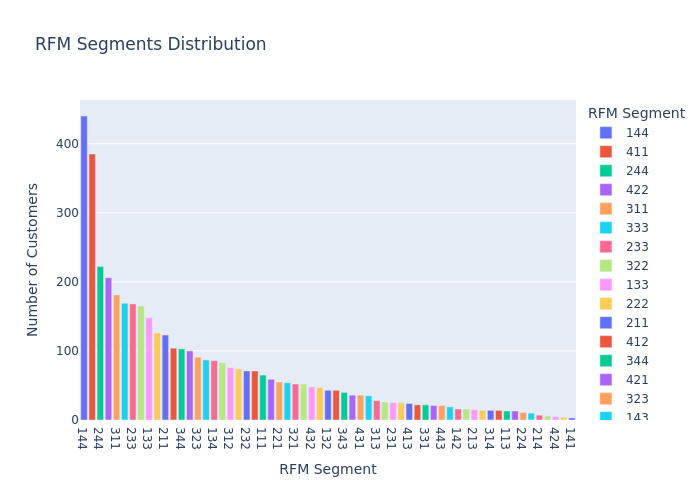

In [5]:
import plotly.express as px

# Count the number of customers in each RFM segment
rfm_segment_counts = rfm_df['RFM_Score'].value_counts().reset_index()
rfm_segment_counts.columns = ['RFM_Score', 'Count']

# Plot the RFM segments
fig = px.bar(rfm_segment_counts, x='RFM_Score', y='Count', title='RFM Segments Distribution',
             labels={'RFM_Score': 'RFM Segment', 'Count': 'Number of Customers'},
             color='RFM_Score',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

The RFM segments have been visualized successfully. The bar chart shows the distribution of customers across different RFM segments.



#### Insights on the most valuable customers.

To identify the most valuable customers, we can focus on those with the highest RFM scores. Typically, customers with high Recency (R), high Frequency (F), and high Monetary (M) values are considered the most valuable.

Let's filter out the customers with the highest RFM scores (e.g., R=4, F=4, M=4) and analyze their characteristics.

In [6]:
# Filter the most valuable customers (R=4, F=4, M=4)
most_valuable_customers = rfm_df[(rfm_df['R'] == 4) & (rfm_df['F'] == 4) & (rfm_df['M'] == 4)]

# Display the most valuable customers
most_valuable_customers

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12501.0,336,149,2169.390,4,4,4,444
12669.0,150,101,2744.030,4,4,4,444
12840.0,143,113,2726.770,4,4,4,444
13093.0,275,159,7832.470,4,4,4,444
13952.0,217,137,3251.071,4,4,4,444
14016.0,161,161,4341.210,4,4,4,444
14245.0,219,108,1693.450,4,4,4,444
14461.0,148,180,2103.060,4,4,4,444
15235.0,217,143,2247.510,4,4,4,444


The most valuable customers have been identified based on their RFM scores (R=4, F=4, M=4). These customers have high recency, frequency, and monetary values, indicating they are highly engaged and valuable to the business.

Here is a preview of the most valuable customers:

| CustomerID | Recency | Frequency | Monetary |
|------------|---------|-----------|----------|
| 12501.0    | 336     | 149       | 2169.39  |
| 12669.0    | 150     | 101       | 2744.03  |
| 12840.0    | 143     | 113       | 2726.77  |
| 13093.0    | 275     | 159       | 7832.47  |
| 13952.0    | 217     | 137       | 3251.07  |

